In [82]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from random import sample
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
from scipy.stats import spearmanr
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import math

### Pre-processing of data and Normalizing the columns for Machine Learning

In [83]:
# read in the data

data = pd.read_csv('clearCellPanCancerRNASeq.txt', sep = '\t')

In [84]:
data


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,NaN,100130426,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,...,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676
1,NaN,100133144,-0.5753,-0.7762,-0.4814,-1.0503,0.3469,0.9640,0.3559,1.4279,...,-1.4083,-0.3365,-2.5785,-1.7795,-1.0532,0.0437,1.6384,-0.6727,1.2119,-0.2841
2,UBE2Q2P2,100134869,1.5330,-0.8846,0.9591,-0.1307,-0.7251,0.1501,1.7671,1.3798,...,-1.3146,-0.2178,0.9558,0.1146,0.0269,-0.3733,-0.5922,1.0389,1.0047,1.2347
3,HMGB1P1,10357,-0.1705,-1.4633,-0.4017,0.5109,0.3479,0.2764,-0.7512,1.0135,...,-2.2709,0.1162,-2.1799,-0.1198,-0.9857,0.7672,0.5340,-0.7807,0.8207,-0.3122
4,NaN,10431,-0.5638,1.8407,-0.3784,-0.6540,0.1371,0.0506,1.0162,-1.3801,...,3.3000,-0.0293,1.9491,-0.4814,-0.9397,-0.1634,-0.1414,1.7140,-0.4790,1.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,0.6702,-1.1783,-1.3833,0.0277,-1.4317,0.7669,0.1671,-0.8929,...,0.1541,0.1446,1.4210,-1.9608,-1.4134,0.9091,-1.9608,-1.5976,-0.5154,0.1402
20527,ZYG11B,79699,-1.5561,-0.2878,0.2277,0.2114,0.3586,1.1240,1.0224,0.1485,...,-2.3133,-1.0270,-2.0189,-2.0763,-0.0106,-0.4183,-1.0828,-1.2610,-1.2659,0.5264
20528,ZYX,7791,-0.1694,-0.5341,-1.1663,-0.0326,0.4660,-0.2746,-0.9959,0.2987,...,-0.0140,0.1428,-0.5761,0.1863,0.5376,0.5881,-0.2982,0.7210,-0.0197,-1.9392
20529,ZZEF1,23140,-0.8661,0.8290,-0.2380,-0.3843,1.0338,0.3609,2.4608,0.2841,...,-1.0232,-0.6886,-2.5266,0.0118,0.9130,0.0995,-0.9156,0.0917,-0.2493,1.0580


In [85]:
data = data.drop(['Entrez_Gene_Id'], axis=1)
data

,Hugo_Symbol,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,NaN,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,...,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676,-3.0676
1,NaN,-0.5753,-0.7762,-0.4814,-1.0503,0.3469,0.9640,0.3559,1.4279,1.5921,...,-1.4083,-0.3365,-2.5785,-1.7795,-1.0532,0.0437,1.6384,-0.6727,1.2119,-0.2841
2,UBE2Q2P2,1.5330,-0.8846,0.9591,-0.1307,-0.7251,0.1501,1.7671,1.3798,1.6396,...,-1.3146,-0.2178,0.9558,0.1146,0.0269,-0.3733,-0.5922,1.0389,1.0047,1.2347
3,HMGB1P1,-0.1705,-1.4633,-0.4017,0.5109,0.3479,0.2764,-0.7512,1.0135,-0.4347,...,-2.2709,0.1162,-2.1799,-0.1198,-0.9857,0.7672,0.5340,-0.7807,0.8207,-0.3122
4,NaN,-0.5638,1.8407,-0.3784,-0.6540,0.1371,0.0506,1.0162,-1.3801,0.4242,...,3.3000,-0.0293,1.9491,-0.4814,-0.9397,-0.1634,-0.1414,1.7140,-0.4790,1.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,0.6702,-1.1783,-1.3833,0.0277,-1.4317,0.7669,0.1671,-0.8929,-1.5118,...,0.1541,0.1446,1.4210,-1.9608,-1.4134,0.9091,-1.9608,-1.5976,-0.5154,0.1402
20527,ZYG11B,-1.5561,-0.2878,0.2277,0.2114,0.3586,1.1240,1.0224,0.1485,0.4126,...,-2.3133,-1.0270,-2.0189,-2.0763,-0.0106,-0.4183,-1.0828,-1.2610,-1.2659,0.5264
20528,ZYX,-0.1694,-0.5341,-1.1663,-0.0326,0.4660,-0.2746,-0.9959,0.2987,0.6643,...,-0.0140,0.1428,-0.5761,0.1863,0.5376,0.5881,-0.2982,0.7210,-0.0197,-1.9392
20529,ZZEF1,-0.8661,0.8290,-0.2380,-0.3843,1.0338,0.3609,2.4608,0.2841,1.4805,...,-1.0232,-0.6886,-2.5266,0.0118,0.9130,0.0995,-0.9156,0.0917,-0.2493,1.0580


In [86]:
# remove genes which were NaN

data = data.dropna(subset=['Hugo_Symbol'])
data

,Hugo_Symbol,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
2,UBE2Q2P2,1.5330,-0.8846,0.9591,-0.1307,-0.7251,0.1501,1.7671,1.3798,1.6396,...,-1.3146,-0.2178,0.9558,0.1146,0.0269,-0.3733,-0.5922,1.0389,1.0047,1.2347
3,HMGB1P1,-0.1705,-1.4633,-0.4017,0.5109,0.3479,0.2764,-0.7512,1.0135,-0.4347,...,-2.2709,0.1162,-2.1799,-0.1198,-0.9857,0.7672,0.5340,-0.7807,0.8207,-0.3122
7,RNU12-2P,-1.9014,0.0808,0.6363,0.9202,-0.1386,-1.1221,2.3754,-0.4961,1.2587,...,-1.9014,-1.9014,1.1064,-0.8711,-1.9014,0.5879,-1.9014,0.1420,-0.9710,0.5751
8,SSX9P,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,...,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716,-0.9716
10,EZHIP,-1.6097,-0.5405,-0.5718,0.1313,0.6413,0.1493,-1.1338,-0.3553,-1.6097,...,-0.2891,2.0157,-1.6097,2.6225,-1.6097,-0.5937,1.8147,0.1134,-1.6097,-1.2275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,0.6702,-1.1783,-1.3833,0.0277,-1.4317,0.7669,0.1671,-0.8929,-1.5118,...,0.1541,0.1446,1.4210,-1.9608,-1.4134,0.9091,-1.9608,-1.5976,-0.5154,0.1402
20527,ZYG11B,-1.5561,-0.2878,0.2277,0.2114,0.3586,1.1240,1.0224,0.1485,0.4126,...,-2.3133,-1.0270,-2.0189,-2.0763,-0.0106,-0.4183,-1.0828,-1.2610,-1.2659,0.5264
20528,ZYX,-0.1694,-0.5341,-1.1663,-0.0326,0.4660,-0.2746,-0.9959,0.2987,0.6643,...,-0.0140,0.1428,-0.5761,0.1863,0.5376,0.5881,-0.2982,0.7210,-0.0197,-1.9392
20529,ZZEF1,-0.8661,0.8290,-0.2380,-0.3843,1.0338,0.3609,2.4608,0.2841,1.4805,...,-1.0232,-0.6886,-2.5266,0.0118,0.9130,0.0995,-0.9156,0.0917,-0.2493,1.0580


In [87]:
# transpose the data so that genes are columns and rows are samples

data = np.transpose(data)
data



,2,3,7,8,10,11,12,14,15,16,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,0.2168,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556
TCGA-6D-AA2E-01,-0.8846,-1.4633,0.0808,-0.9716,-0.5405,-0.1462,-0.1483,-1.5069,-3.1335,-2.1698,...,-1.8011,-1.8594,-0.6718,-1.4628,0.198,-1.1783,-0.2878,-0.5341,0.829,1.2294
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,0.1438,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.3538,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-0.3733,0.7672,0.5879,-0.9716,-0.5937,0.2297,-1.662,-1.5069,-3.1335,-2.1698,...,0.4064,0.7437,-0.8922,-1.067,0.2343,0.9091,-0.4183,0.5881,0.0995,-0.4166
TCGA-MM-A564-01,-0.5922,0.534,-1.9014,-0.9716,1.8147,0.5117,-0.6145,-0.2633,-3.1335,-2.1698,...,-1.0654,-1.36,-1.0739,-0.5155,-1.7453,-1.9608,-1.0828,-0.2982,-0.9156,-0.4866
TCGA-MM-A84U-01,1.0389,-0.7807,0.142,-0.9716,0.1134,0.7526,-0.0669,-1.5069,-3.1335,-2.1698,...,-0.3159,0.0888,-1.1963,-1.4288,-0.6888,-1.5976,-1.261,0.721,0.0917,-0.8585
TCGA-MW-A4EC-01,1.0047,0.8207,-0.971,-0.9716,-1.6097,-1.616,0.0286,-1.5069,-3.1335,-2.1698,...,-1.0156,0.0721,-0.087,-0.2223,-1.6487,-0.5154,-1.2659,-0.0197,-0.2493,-1.3098


In [88]:
# rename columns for dataframe

columns = data.iloc[0]

In [89]:
data = data[1:]

In [90]:
data.columns = columns
data

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,0.2168,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556
TCGA-6D-AA2E-01,-0.8846,-1.4633,0.0808,-0.9716,-0.5405,-0.1462,-0.1483,-1.5069,-3.1335,-2.1698,...,-1.8011,-1.8594,-0.6718,-1.4628,0.198,-1.1783,-0.2878,-0.5341,0.829,1.2294
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,0.1438,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.3538,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237
TCGA-A3-3308-01,-0.7251,0.3479,-0.1386,-0.9716,0.6413,5.1752,-0.2553,-1.5069,-3.1335,-2.1698,...,0.3166,0.4334,0.1857,0.1363,1.4538,-1.4317,0.3586,0.466,1.0338,1.0562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-0.3733,0.7672,0.5879,-0.9716,-0.5937,0.2297,-1.662,-1.5069,-3.1335,-2.1698,...,0.4064,0.7437,-0.8922,-1.067,0.2343,0.9091,-0.4183,0.5881,0.0995,-0.4166
TCGA-MM-A564-01,-0.5922,0.534,-1.9014,-0.9716,1.8147,0.5117,-0.6145,-0.2633,-3.1335,-2.1698,...,-1.0654,-1.36,-1.0739,-0.5155,-1.7453,-1.9608,-1.0828,-0.2982,-0.9156,-0.4866
TCGA-MM-A84U-01,1.0389,-0.7807,0.142,-0.9716,0.1134,0.7526,-0.0669,-1.5069,-3.1335,-2.1698,...,-0.3159,0.0888,-1.1963,-1.4288,-0.6888,-1.5976,-1.261,0.721,0.0917,-0.8585
TCGA-MW-A4EC-01,1.0047,0.8207,-0.971,-0.9716,-1.6097,-1.616,0.0286,-1.5069,-3.1335,-2.1698,...,-1.0156,0.0721,-0.087,-0.2223,-1.6487,-0.5154,-1.2659,-0.0197,-0.2493,-1.3098


### Matching sample ID with metastasis status

In [91]:
metastasis = pd.read_csv('clearCellPanCancerClinical.txt', sep = '\t')

In [92]:
metastasis

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,...,Subtype,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tissue Source Site Code,TMB (nonsynonymous),Tumor Disease Anatomic Site,Tumor Type,Patient Weight,Winter Hypoxia Score
0,kirc_tcga_pan_can_atlas_2018,TCGA-3Z-A93Z,TCGA-3Z-A93Z-01,69,STAGE I,7TH,7.0,5.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,Yes,No,Mary Bird Perkins Cancer Center - Our Lady of ...,3Z,2.666667,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-10.0
1,kirc_tcga_pan_can_atlas_2018,TCGA-6D-AA2E,TCGA-6D-AA2E-01,68,STAGE I,7TH,0.0,-15.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,Yes,No,University of Oklahoma HSC,6D,0.833333,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-26.0
2,kirc_tcga_pan_can_atlas_2018,TCGA-A3-3306,TCGA-A3-3306-01,67,STAGE I,NaN,9.0,15.0,Renal Clear Cell Carcinoma,KIRC,...,NaN,No,Yes,International Genomics Consortium,A3,0.000000,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-18.0
3,kirc_tcga_pan_can_atlas_2018,TCGA-A3-3307,TCGA-A3-3307-01,66,STAGE III,NaN,1.0,3.0,Renal Clear Cell Carcinoma,KIRC,...,NaN,No,Yes,International Genomics Consortium,A3,0.000000,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-12.0
4,kirc_tcga_pan_can_atlas_2018,TCGA-A3-3308,TCGA-A3-3308-01,77,STAGE III,NaN,3.0,1.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,No,Yes,International Genomics Consortium,A3,2.400000,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,kirc_tcga_pan_can_atlas_2018,TCGA-MM-A563,TCGA-MM-A563-01,41,STAGE I,7TH,8.0,3.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,No,Yes,BLN - Baylor,MM,1.566667,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-24.0
508,kirc_tcga_pan_can_atlas_2018,TCGA-MM-A564,TCGA-MM-A564-01,68,STAGE II,7TH,9.0,11.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,No,Yes,BLN - Baylor,MM,2.733333,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-4.0
509,kirc_tcga_pan_can_atlas_2018,TCGA-MM-A84U,TCGA-MM-A84U-01,58,STAGE I,7TH,5.0,1.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,No,Yes,BLN - Baylor,MM,2.566667,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,4.0
510,kirc_tcga_pan_can_atlas_2018,TCGA-MW-A4EC,TCGA-MW-A4EC-01,72,STAGE I,7TH,4.0,11.0,Renal Clear Cell Carcinoma,KIRC,...,KIRC,Yes,No,University of Miami,MW,1.200000,Kidney,Kidney Clear Cell Renal Carcinoma,NaN,-2.0


In [93]:
# obtain a list of sample ID

idList = metastasis['Sample ID'].tolist()
print(len(idList))

512


In [94]:
metStatus = metastasis['American Joint Committee on Cancer Metastasis Stage Code'].tolist()

In [95]:
dataID = data.index.tolist()



In [96]:
dataID

['TCGA-3Z-A93Z-01',
 'TCGA-6D-AA2E-01',
 'TCGA-A3-3306-01',
 'TCGA-A3-3307-01',
 'TCGA-A3-3308-01',
 'TCGA-A3-3311-01',
 'TCGA-A3-3313-01',
 'TCGA-A3-3316-01',
 'TCGA-A3-3317-01',
 'TCGA-A3-3319-01',
 'TCGA-A3-3320-01',
 'TCGA-A3-3322-01',
 'TCGA-A3-3323-01',
 'TCGA-A3-3324-01',
 'TCGA-A3-3325-01',
 'TCGA-A3-3326-01',
 'TCGA-A3-3331-01',
 'TCGA-A3-3335-01',
 'TCGA-A3-3343-01',
 'TCGA-A3-3346-01',
 'TCGA-A3-3347-01',
 'TCGA-A3-3349-01',
 'TCGA-A3-3351-01',
 'TCGA-A3-3352-01',
 'TCGA-A3-3357-01',
 'TCGA-A3-3358-01',
 'TCGA-A3-3359-01',
 'TCGA-A3-3362-01',
 'TCGA-A3-3363-01',
 'TCGA-A3-3365-01',
 'TCGA-A3-3367-01',
 'TCGA-A3-3370-01',
 'TCGA-A3-3372-01',
 'TCGA-A3-3373-01',
 'TCGA-A3-3374-01',
 'TCGA-A3-3376-01',
 'TCGA-A3-3378-01',
 'TCGA-A3-3380-01',
 'TCGA-A3-3382-01',
 'TCGA-A3-3383-01',
 'TCGA-A3-3385-01',
 'TCGA-A3-3387-01',
 'TCGA-A3-A6NI-01',
 'TCGA-A3-A6NJ-01',
 'TCGA-A3-A6NL-01',
 'TCGA-A3-A6NN-01',
 'TCGA-A3-A8CQ-01',
 'TCGA-A3-A8OU-01',
 'TCGA-A3-A8OV-01',
 'TCGA-A3-A8OW-01',


In [97]:
idList

['TCGA-3Z-A93Z-01',
 'TCGA-6D-AA2E-01',
 'TCGA-A3-3306-01',
 'TCGA-A3-3307-01',
 'TCGA-A3-3308-01',
 'TCGA-A3-3311-01',
 'TCGA-A3-3313-01',
 'TCGA-A3-3316-01',
 'TCGA-A3-3317-01',
 'TCGA-A3-3319-01',
 'TCGA-A3-3320-01',
 'TCGA-A3-3322-01',
 'TCGA-A3-3323-01',
 'TCGA-A3-3324-01',
 'TCGA-A3-3325-01',
 'TCGA-A3-3326-01',
 'TCGA-A3-3331-01',
 'TCGA-A3-3335-01',
 'TCGA-A3-3343-01',
 'TCGA-A3-3346-01',
 'TCGA-A3-3347-01',
 'TCGA-A3-3349-01',
 'TCGA-A3-3351-01',
 'TCGA-A3-3352-01',
 'TCGA-A3-3357-01',
 'TCGA-A3-3358-01',
 'TCGA-A3-3359-01',
 'TCGA-A3-3362-01',
 'TCGA-A3-3363-01',
 'TCGA-A3-3365-01',
 'TCGA-A3-3367-01',
 'TCGA-A3-3370-01',
 'TCGA-A3-3372-01',
 'TCGA-A3-3373-01',
 'TCGA-A3-3374-01',
 'TCGA-A3-3376-01',
 'TCGA-A3-3378-01',
 'TCGA-A3-3380-01',
 'TCGA-A3-3382-01',
 'TCGA-A3-3383-01',
 'TCGA-A3-3385-01',
 'TCGA-A3-3387-01',
 'TCGA-A3-A6NI-01',
 'TCGA-A3-A6NJ-01',
 'TCGA-A3-A6NL-01',
 'TCGA-A3-A6NN-01',
 'TCGA-A3-A8CQ-01',
 'TCGA-A3-A8OU-01',
 'TCGA-A3-A8OV-01',
 'TCGA-A3-A8OW-01',


In [98]:
# create column for metastasis status in data dataframe
listDataStatus = []
for name in dataID:
    if name in idList:
        index = idList.index(name)
        listDataStatus.append(metStatus[index])
        

In [99]:
listDataStatus

['M0',
 'MX',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M1',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',

In [100]:
data['status'] = listDataStatus

C:\Users\Tresha\AppData\Local\Temp\ipykernel_33436\2309205045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = listDataStatus


In [101]:
data

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,status
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556,M0
TCGA-6D-AA2E-01,-0.8846,-1.4633,0.0808,-0.9716,-0.5405,-0.1462,-0.1483,-1.5069,-3.1335,-2.1698,...,-1.8594,-0.6718,-1.4628,0.198,-1.1783,-0.2878,-0.5341,0.829,1.2294,MX
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239,M0
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237,M0
TCGA-A3-3308-01,-0.7251,0.3479,-0.1386,-0.9716,0.6413,5.1752,-0.2553,-1.5069,-3.1335,-2.1698,...,0.4334,0.1857,0.1363,1.4538,-1.4317,0.3586,0.466,1.0338,1.0562,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-0.3733,0.7672,0.5879,-0.9716,-0.5937,0.2297,-1.662,-1.5069,-3.1335,-2.1698,...,0.7437,-0.8922,-1.067,0.2343,0.9091,-0.4183,0.5881,0.0995,-0.4166,MX
TCGA-MM-A564-01,-0.5922,0.534,-1.9014,-0.9716,1.8147,0.5117,-0.6145,-0.2633,-3.1335,-2.1698,...,-1.36,-1.0739,-0.5155,-1.7453,-1.9608,-1.0828,-0.2982,-0.9156,-0.4866,MX
TCGA-MM-A84U-01,1.0389,-0.7807,0.142,-0.9716,0.1134,0.7526,-0.0669,-1.5069,-3.1335,-2.1698,...,0.0888,-1.1963,-1.4288,-0.6888,-1.5976,-1.261,0.721,0.0917,-0.8585,MX
TCGA-MW-A4EC-01,1.0047,0.8207,-0.971,-0.9716,-1.6097,-1.616,0.0286,-1.5069,-3.1335,-2.1698,...,0.0721,-0.087,-0.2223,-1.6487,-0.5154,-1.2659,-0.0197,-0.2493,-1.3098,MX


In [102]:
# filter 

In [103]:
statusData = data[data['status'].isin(['M0','M1'])]

In [104]:
statusData

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,status
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556,M0
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239,M0
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237,M0
TCGA-A3-3308-01,-0.7251,0.3479,-0.1386,-0.9716,0.6413,5.1752,-0.2553,-1.5069,-3.1335,-2.1698,...,0.4334,0.1857,0.1363,1.4538,-1.4317,0.3586,0.466,1.0338,1.0562,M0
TCGA-A3-3311-01,0.1501,0.2764,-1.1221,-0.9716,0.1493,0.0858,-1.0146,0.9951,-3.1335,-2.1698,...,0.3868,1.2243,1.0253,0.376,0.7669,1.124,-0.2746,0.3609,1.1436,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EU-5904-01,-1.0963,0.293,-1.9014,-0.9716,-0.8188,-1.616,-0.3704,-1.5069,-3.1335,-2.1698,...,-1.2366,0.1255,0.6443,0.5348,0.2409,0.7748,-0.2849,-0.0303,0.233,M0
TCGA-EU-5905-01,0.5775,-1.7819,0.9541,-0.9716,-0.4272,-1.616,-0.9495,-1.5069,-3.1335,-2.1698,...,-1.5423,0.1411,1.2067,-0.6596,0.6656,-0.6345,-0.0205,1.0231,-1.0936,M0
TCGA-EU-5906-01,-1.2401,-0.3246,-1.9014,-0.9716,-1.0431,-1.616,-1.4055,-0.9645,-3.1335,-2.1698,...,0.894,0.7211,0.6585,-0.066,0.0019,1.1697,-0.1863,0.5518,0.7498,M0
TCGA-EU-5907-01,0.5853,-0.4119,-1.9014,-0.9716,-1.6097,-1.616,-1.2778,-1.5069,-3.1335,-2.1698,...,-1.1418,1.3005,0.542,-2.6669,0.3612,-1.1085,-1.5267,1.0642,-1.5799,M0


In [105]:
statusData = statusData.dropna(axis=1)

In [106]:
m0 = statusData[statusData['status'] == 'M0']
m1 = statusData[statusData['status'] == 'M1']

In [107]:

m0 = m0.drop('status', axis = 1)

In [108]:
m1 = m1.drop('status', axis = 1)

In [109]:
m0

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,0.2168,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,0.1438,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.3538,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237
TCGA-A3-3308-01,-0.7251,0.3479,-0.1386,-0.9716,0.6413,5.1752,-0.2553,-1.5069,-3.1335,-2.1698,...,0.3166,0.4334,0.1857,0.1363,1.4538,-1.4317,0.3586,0.466,1.0338,1.0562
TCGA-A3-3311-01,0.1501,0.2764,-1.1221,-0.9716,0.1493,0.0858,-1.0146,0.9951,-3.1335,-2.1698,...,0.5506,0.3868,1.2243,1.0253,0.376,0.7669,1.124,-0.2746,0.3609,1.1436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,0.2846,0.7278,-1.048,-0.9716,-0.518,-1.616,0.3523,-0.0928,-3.1335,-2.1698,...,-0.3922,-0.758,0.2054,1.2671,0.5611,-0.8414,0.1706,0.1219,1.0014,0.7829
TCGA-EU-5904-01,-1.0963,0.293,-1.9014,-0.9716,-0.8188,-1.616,-0.3704,-1.5069,-3.1335,-2.1698,...,-0.8005,-1.2366,0.1255,0.6443,0.5348,0.2409,0.7748,-0.2849,-0.0303,0.233
TCGA-EU-5905-01,0.5775,-1.7819,0.9541,-0.9716,-0.4272,-1.616,-0.9495,-1.5069,-3.1335,-2.1698,...,-0.8228,-1.5423,0.1411,1.2067,-0.6596,0.6656,-0.6345,-0.0205,1.0231,-1.0936
TCGA-EU-5906-01,-1.2401,-0.3246,-1.9014,-0.9716,-1.0431,-1.616,-1.4055,-0.9645,-3.1335,-2.1698,...,-0.233,0.894,0.7211,0.6585,-0.066,0.0019,1.1697,-0.1863,0.5518,0.7498


In [110]:
m1

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-AK-3436-01,0.3982,-0.7617,1.537,-0.9716,0.245,0.2525,-0.4646,-1.5069,-3.1335,-2.1698,...,-0.323,-0.1647,0.0158,0.4439,0.6938,-0.1138,-1.708,0.8077,-1.4883,-1.4899
TCGA-B0-4688-01,1.589,-1.3308,0.9214,1.706,-1.6097,-1.616,0.3348,-1.5069,-3.1335,-2.1698,...,5.4951,1.6285,-0.2927,0.7317,-1.9748,-1.5132,-0.5105,0.8317,1.8623,1.2666
TCGA-B0-4690-01,1.0337,0.7604,0.5681,-0.9716,-1.1475,1.1565,-0.6376,-1.5069,-3.1335,-2.1698,...,2.6203,1.3237,-0.4831,-0.4777,0.7897,0.5176,0.1274,0.7454,-0.1838,1.0725
TCGA-B0-4691-01,-0.4442,-1.0957,-0.0245,-0.9716,0.2201,-1.616,0.414,1.2947,1.9924,-2.1698,...,0.3182,1.2537,-1.4889,-1.3294,-0.6934,-0.9426,-1.0886,1.1134,-1.371,-0.624
TCGA-B0-4697-01,-0.3332,0.4022,-1.9014,-0.9716,1.3536,3.2995,1.1237,-1.5069,-3.1335,-2.1698,...,0.4089,0.8333,-1.673,-1.1194,0.113,0.3347,-1.5417,0.7155,0.8493,-0.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CZ-5462-01,-1.2902,-0.5484,-0.6107,-0.9716,-1.2206,-0.659,0.3873,-1.5069,-3.1335,-2.1698,...,-0.5141,-1.6313,0.4523,0.5539,-1.5773,0.0158,-0.7118,-1.198,-0.4919,-1.7772
TCGA-CZ-5464-01,-1.1836,0.9124,-1.1601,-0.9716,0.768,-1.616,-1.112,-1.5069,-3.1335,-2.1698,...,0.5274,0.6945,0.0663,0.4907,-0.3391,-0.054,-0.5974,0.0553,-0.155,-0.3734
TCGA-CZ-5468-01,-0.6392,-0.5808,-0.385,-0.9716,-1.6097,-0.4916,-0.1396,-1.5069,-3.1335,-2.1698,...,0.5049,0.7853,-0.4665,-0.396,-2.022,-0.3362,-0.7781,1.5511,-1.1198,-1.3663
TCGA-CZ-5987-01,-0.2342,-1.0435,-0.4865,-0.9716,-0.8465,-0.5669,-1.165,0.6965,-3.1335,-2.1698,...,-0.3145,1.0053,-0.3307,0.0827,-2.5046,-1.5361,-0.0407,-0.4315,-1.1625,-0.7918


In [111]:
print(len(m0.columns))

20200


In [112]:
print(len(m1.columns))

20200


In [113]:
# make both dataframes have the same number of rows

newM1 = m1.sample(401, replace = True)


In [114]:
newM1

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-CJ-4904-01,-0.6131,1.4647,-1.2769,-0.9716,-1.6097,-1.616,-0.9526,-0.9188,-3.1335,-2.1698,...,0.1638,-0.4502,0.8064,0.2143,-0.8828,0.3819,0.2617,0.1998,0.0001,-0.2064
TCGA-CZ-5464-01,-1.1836,0.9124,-1.1601,-0.9716,0.768,-1.616,-1.112,-1.5069,-3.1335,-2.1698,...,0.5274,0.6945,0.0663,0.4907,-0.3391,-0.054,-0.5974,0.0553,-0.155,-0.3734
TCGA-CJ-4644-01,-1.1723,0.5411,-1.9014,-0.9716,-1.1352,-1.616,-0.7705,-0.6784,-3.1335,-2.1698,...,-0.6841,0.2602,0.27,-0.7274,-1.2561,0.2713,-0.2797,-0.6328,-1.4926,-0.5459
TCGA-B0-4688-01,1.589,-1.3308,0.9214,1.706,-1.6097,-1.616,0.3348,-1.5069,-3.1335,-2.1698,...,5.4951,1.6285,-0.2927,0.7317,-1.9748,-1.5132,-0.5105,0.8317,1.8623,1.2666
TCGA-B0-4828-01,1.0437,0.5437,-1.9014,-0.9716,2.642,0.7911,-1.4416,1.9609,-3.1335,-2.1698,...,-1.8149,-0.2536,-0.5272,-0.0627,0.3012,1.2766,-0.6905,-0.5814,-0.3815,-0.6398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BP-4335-01,0.6504,-1.0112,-1.9014,-0.5388,2.725,0.2534,0.5373,2.8918,-3.1335,-2.1698,...,0.0324,0.2455,-0.8809,-1.714,0.6107,1.1296,-0.3999,0.0299,0.3302,-0.1328
TCGA-B0-4714-01,1.0191,0.7637,0.6253,-0.9716,2.0571,0.2575,0.4691,-0.4491,-3.1335,-2.1698,...,-0.3539,-0.3918,0.049,-0.5184,0.7618,1.3958,-0.511,0.0121,0.5804,-0.4513
TCGA-BP-4354-01,-0.8699,-0.6235,0.7094,-0.9716,-0.9782,0.3198,1.5498,0.3629,-3.1335,-2.1698,...,2.1428,1.5488,-0.6673,-0.0794,-0.2053,-1.9608,0.189,0.6451,0.4221,0.7464
TCGA-B0-4703-01,0.271,0.1672,1.6183,-0.9716,-1.6097,0.9938,0.1638,-1.5069,-3.1335,-2.1698,...,1.3682,1.1569,0.6538,-0.5379,0.7934,-1.9608,0.0323,0.4582,0.6003,0.7923


In [115]:
m0

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3Z-A93Z-01,1.533,-0.1705,-1.9014,-0.9716,-1.6097,-1.616,1.1595,-1.5069,-3.1335,-2.1698,...,0.2168,-0.256,-1.3834,-1.5301,-1.8194,0.6702,-1.5561,-0.1694,-0.8661,-1.2556
TCGA-A3-3306-01,0.9591,-0.4017,0.6363,-0.9716,-0.5718,-1.616,1.9065,-1.5069,-3.1335,-2.1698,...,0.1438,-0.0295,0.7047,0.5639,-1.898,-1.3833,0.2277,-1.1663,-0.238,1.3239
TCGA-A3-3307-01,-0.1307,0.5109,0.9202,-0.9716,0.1313,-0.309,1.0026,0.7001,-3.1335,-2.1698,...,0.3538,0.1555,0.1333,0.5723,0.3619,0.0277,0.2114,-0.0326,-0.3843,0.2237
TCGA-A3-3308-01,-0.7251,0.3479,-0.1386,-0.9716,0.6413,5.1752,-0.2553,-1.5069,-3.1335,-2.1698,...,0.3166,0.4334,0.1857,0.1363,1.4538,-1.4317,0.3586,0.466,1.0338,1.0562
TCGA-A3-3311-01,0.1501,0.2764,-1.1221,-0.9716,0.1493,0.0858,-1.0146,0.9951,-3.1335,-2.1698,...,0.5506,0.3868,1.2243,1.0253,0.376,0.7669,1.124,-0.2746,0.3609,1.1436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,0.2846,0.7278,-1.048,-0.9716,-0.518,-1.616,0.3523,-0.0928,-3.1335,-2.1698,...,-0.3922,-0.758,0.2054,1.2671,0.5611,-0.8414,0.1706,0.1219,1.0014,0.7829
TCGA-EU-5904-01,-1.0963,0.293,-1.9014,-0.9716,-0.8188,-1.616,-0.3704,-1.5069,-3.1335,-2.1698,...,-0.8005,-1.2366,0.1255,0.6443,0.5348,0.2409,0.7748,-0.2849,-0.0303,0.233
TCGA-EU-5905-01,0.5775,-1.7819,0.9541,-0.9716,-0.4272,-1.616,-0.9495,-1.5069,-3.1335,-2.1698,...,-0.8228,-1.5423,0.1411,1.2067,-0.6596,0.6656,-0.6345,-0.0205,1.0231,-1.0936
TCGA-EU-5906-01,-1.2401,-0.3246,-1.9014,-0.9716,-1.0431,-1.616,-1.4055,-0.9645,-3.1335,-2.1698,...,-0.233,0.894,0.7211,0.6585,-0.066,0.0019,1.1697,-0.1863,0.5518,0.7498


### Using Spearman Correlation Coefficient 

In [116]:
# calculate pearson correlation coefficient


geneCorr = []
for idx,gene in enumerate(m0.columns):
    if m0.iloc[:,idx].nunique() == 1 or newM1.iloc[:,idx].nunique() == 1:
        continue
    else:
        
        corrCoeff, pVal = pearsonr(m0.iloc[:,idx], newM1.iloc[:,idx])
        geneCorr.append((corrCoeff,pVal, gene))

In [117]:
geneCorr

[(0.0453390850145575, 0.3651762081278339, 'UBE2Q2P2'),
 (-0.008059184877184634, 0.8721848662612139, 'HMGB1P1'),
 (0.09884119166572591, 0.047933174660739444, 'RNU12-2P'),
 (-0.017177430948952774, 0.7316516492017474, 'SSX9P'),
 (0.04081399838278884, 0.4150219390335406, 'EZHIP'),
 (0.01313002917254291, 0.7932295846602749, 'EFCAB8'),
 (-0.049721539649656324, 0.3206225897569985, 'SRP14P1'),
 (-0.054159993786931954, 0.2792695597661492, 'TRIM75P'),
 (-0.022435566718268237, 0.6542067671825792, 'SPATA31B1P'),
 (-0.009016548865293919, 0.8571554971339815, 'REXO1L6P'),
 (-0.013374343041866825, 0.789471548127664, 'SDR16C6P'),
 (0.1059628220705547, 0.033900329758902434, 'HSPB1P1'),
 (0.008794945744142866, 0.8606299973315735, 'ANKRD20A20P'),
 (-0.013491630376484317, 0.7876691600695939, 'GTPBP6'),
 (-0.03438357008430642, 0.492344841811749, 'EFCAB12'),
 (-0.056234945430563836, 0.261234632977786, 'A1BG'),
 (0.014818730076907451, 0.7673562918866588, 'A1CF'),
 (0.06942007304746413, 0.1652983038539705, 'A2

In [118]:
correlationList = [abs(i[0]) for i in geneCorr if not math.isnan(i[0])]

In [119]:
geneList = [i[2] for i in geneCorr]

In [120]:
correlationList

[0.0453390850145575,
 0.008059184877184634,
 0.09884119166572591,
 0.017177430948952774,
 0.04081399838278884,
 0.01313002917254291,
 0.049721539649656324,
 0.054159993786931954,
 0.022435566718268237,
 0.009016548865293919,
 0.013374343041866825,
 0.1059628220705547,
 0.008794945744142866,
 0.013491630376484317,
 0.03438357008430642,
 0.056234945430563836,
 0.014818730076907451,
 0.06942007304746413,
 0.01248414526607692,
 0.12006746611776145,
 0.036878550080267414,
 0.07836938539173774,
 0.005158687459828404,
 0.02051541504665049,
 0.031690559052062584,
 0.04857627004746707,
 0.02545995815783667,
 0.09395747635511452,
 0.008515741809252016,
 0.03662976285944064,
 0.023771425637129445,
 0.15778105563569061,
 0.06556986420493664,
 0.0058870240138408705,
 0.005987320502424736,
 0.038355313285920234,
 0.050273424055372926,
 0.020743083788712518,
 0.04163689004526267,
 0.08384254177768272,
 0.0014381910208065805,
 0.018423934183355556,
 0.04271749781836024,
 0.04081916182867558,
 0.051984

In [121]:
# sort the values in the list 
# create a list with the sorted values 
# create a list with the indices of sorted values

In [122]:
indicesSort = sorted(range(len(correlationList)), key=lambda ind : correlationList[ind])

In [123]:
corrSort = [correlationList[ind] for ind in indicesSort]


In [124]:
geneSort = [geneList[ind] for ind in indicesSort]

In [125]:
# sorting the indices based on descending order of correlation coefficient
# sorting correlation coefficient in descending order
# sorting the genes according to descending correlation coefficient value

indicesSortDesc = indicesSort[::-1]
corrSortDesc = corrSort[::-1]
geneSortDesc = geneSort[::-1]

In [126]:
corrSortDesc 

[0.43737499123640017,
 0.38878390375124083,
 0.3629748752046039,
 0.32281672200145156,
 0.32238697787339426,
 0.2788962361145418,
 0.2555649969249302,
 0.22514741648130684,
 0.21702870623232884,
 0.20887605704415482,
 0.20852414938508484,
 0.20507467180349964,
 0.20176669674188982,
 0.19867841049301946,
 0.1916242092291401,
 0.19106483140111666,
 0.18696055376868112,
 0.18673213114255222,
 0.18597336379862964,
 0.18482338932242742,
 0.18368180413209412,
 0.18329619109292883,
 0.18146778442008787,
 0.18143603676986686,
 0.17692419835728165,
 0.17470867152962183,
 0.17255098635274518,
 0.17254459880309336,
 0.17254341261433187,
 0.17163444646820308,
 0.17104787964510734,
 0.17073621442106368,
 0.17055185409695586,
 0.16859470942037283,
 0.16849194176955343,
 0.16798658264612976,
 0.16691644772384595,
 0.16609097220762747,
 0.1657493409361937,
 0.1650731765687152,
 0.16440236721404014,
 0.16434788736937891,
 0.1643056430009807,
 0.16380571579888462,
 0.16347450032009775,
 0.16328118793907

In [127]:
geneSortDesc

['TLX3',
 'SCGB1D4',
 'SNORA11B',
 'OR6X1',
 'PCNAP1',
 'FRG2',
 'SNAP91',
 'SNORA78',
 'PAX3',
 'CSTB',
 'ZG16',
 'TRIM64',
 'OR5AS1',
 'LOC400940',
 'KLK6',
 'DCD',
 'CPS1-IT1',
 'LIN28B',
 'PAX1',
 'SLC7A4',
 'CLCA1',
 'LOC150622',
 'LRIT1',
 'SNORA1',
 'LCN15',
 'CEACAM16',
 'SNORA42',
 'PRAMEF5',
 'SFTPD',
 'OR4N3P',
 'ZNF426',
 'C19orf30',
 'CD70',
 'CNGB1',
 'GYPC',
 'C2orf27B',
 'GH2',
 'CCDC140',
 'SCARNA8',
 'RAB3B',
 'TTC23L',
 'KCNG3',
 'HMMR',
 'MOV10L1',
 'NSUN4',
 'CENPK',
 'TMEM74',
 'CTXN3',
 'FAM123A',
 'KRT33A',
 'NEK2',
 'NPBWR1',
 'FOXO4',
 'C20orf46',
 'BIN1',
 'C14orf106',
 'BIRC5',
 'MATN4',
 'AADAT',
 'PDCD6',
 'FAM72D',
 'LHX3',
 'RASSF6',
 'IQGAP3',
 'PINK1',
 'PABPC1',
 'SEZ6',
 'ARHGAP10',
 'GNA11',
 'DHCR24',
 'KIF14',
 'ZNF280A',
 'FANCD2',
 'CACNG1',
 'ZNF107',
 'SCHIP1',
 'ERMN',
 'THSD7B',
 'DSN1',
 'IFNK',
 'OR4F21',
 'TRADD',
 'PCSK5',
 'FANCI',
 'BOP1',
 'KIAA1161',
 'CLCN4',
 'RAD51AP1',
 'PSENEN',
 'OR13F1',
 'ZNF839',
 'ZNF695',
 'DLL3',
 'SEPSEC

In [128]:
# export this as a csv file

corrTable = pd.DataFrame({'Index': indicesSortDesc, 
                         'Correlation Coefficient': corrSortDesc,
                         'Genes': geneSortDesc})

corrTable.to_csv('kidneyClearCellPanCancerFinalRNASeq.csv', index=False)

### Using leave-one-out cross validation to get accuracy score for Logistic Regression

In [129]:
m1Data = newM1.loc[:,geneSortDesc[:200]]
m1Data['type'] = 1
m1Data

Hugo_Symbol,TLX3,SCGB1D4,SNORA11B,OR6X1,PCNAP1,FRG2,SNAP91,SNORA78,PAX3,CSTB,...,KANK3,DNAJC2,EIF1B,NUF2,LOC285696,GOLGA4,RAMP3,C21orf128,WDR77,type
TCGA-CJ-4904-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.7858,-3.6497,-0.8406,-0.5897,...,0.5581,0.354,0.5701,-0.3291,-1.3642,0.1851,0.482,0.9376,-0.41,1
TCGA-CZ-5464-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,0.3019,-3.6497,-0.8406,-0.1518,...,0.2239,0.8348,-0.2501,1.3377,-0.7853,-0.3375,0.6082,-1.4143,-0.0799,1
TCGA-CJ-4644-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.4703,-0.1969,...,0.3279,-0.8687,-0.1907,-0.5229,-1.3642,-0.5182,0.3906,-1.4143,0.5207,1
TCGA-B0-4688-01,0.3129,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,1.1637,-3.6497,-0.8406,-0.4967,...,-2.511,2.5502,0.3984,3.7122,2.8228,1.483,-2.7228,-1.4143,1.4816,1
TCGA-B0-4828-01,-0.8227,-1.7006,-2.3354,-2.1858,0.0829,-0.8435,-0.958,-3.6497,-0.8406,-0.6624,...,0.2695,0.755,-0.6242,0.3169,-1.3642,-0.6436,-0.9299,-0.1347,0.1755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BP-4335-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,0.3319,-0.5324,-3.6497,-0.8406,0.5873,...,0.8247,0.7423,0.1203,-0.2044,-1.3642,-0.056,0.7665,2.762,0.6889,1
TCGA-B0-4714-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,0.019,...,0.8693,1.1835,-0.7994,0.6503,-0.4871,-0.6338,0.7948,-0.238,0.1783,1
TCGA-BP-4354-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.6353,-3.6497,-0.3478,0.4017,...,-1.5214,1.3834,-0.3712,1.5514,1.6931,1.3389,-1.5582,0.6534,0.3493,1
TCGA-B0-4703-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.3771,...,0.0632,0.046,-0.1603,1.5273,0.8917,0.0898,-0.1779,-1.4143,-0.1695,1


In [130]:
m0Data = m0.loc[:,geneSortDesc[:200]]
m0Data['type'] = 0
m0Data

Hugo_Symbol,TLX3,SCGB1D4,SNORA11B,OR6X1,PCNAP1,FRG2,SNAP91,SNORA78,PAX3,CSTB,...,KANK3,DNAJC2,EIF1B,NUF2,LOC285696,GOLGA4,RAMP3,C21orf128,WDR77,type
TCGA-3Z-A93Z-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,0.2995,-3.6497,-0.8406,0.0529,...,2.0685,-0.1352,0.7023,-0.6967,-0.3346,-0.3757,1.4247,-1.4143,-0.137,0
TCGA-A3-3306-01,-0.8227,-1.7006,-2.3354,-2.1858,-0.0331,-0.8435,-0.958,-3.6497,-0.8406,-0.9144,...,0.8445,-0.3788,0.3393,0.2607,-0.4822,-0.1991,-1.1121,-1.4143,0.8193,0
TCGA-A3-3307-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.6908,...,0.6263,-0.2043,0.9996,-0.3352,-0.5659,-0.4952,-0.0416,3.1637,0.524,0
TCGA-A3-3308-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,1.2709,-3.6497,-0.8406,-0.5095,...,0.2446,-0.3689,-0.5757,0.2317,0.0124,0.4347,0.5722,0.0254,0.7246,0
TCGA-A3-3311-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.215,...,-0.8661,-0.7107,-0.9239,0.0867,-1.3642,0.193,0.0815,-1.4143,0.8249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.4814,-1.0932,...,0.4666,-0.3721,1.0167,-1.5094,-1.3642,0.9169,0.7024,0.0979,-0.8081,0
TCGA-EU-5904-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.2807,...,0.9994,-0.5291,0.4593,-1.7416,-1.3642,0.7413,0.9542,1.4723,-0.9853,0
TCGA-EU-5905-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.6983,...,-0.2647,-1.2872,-0.0676,-1.3141,-1.3642,0.2348,0.6999,-1.4143,-1.5585,0
TCGA-EU-5906-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-1.1277,...,0.4525,-1.0247,0.0901,0.109,-0.9145,0.872,0.4677,-1.4143,-0.2994,0


In [131]:
finalData = pd.concat([m0Data, m1Data], axis=0)
finalData

Hugo_Symbol,TLX3,SCGB1D4,SNORA11B,OR6X1,PCNAP1,FRG2,SNAP91,SNORA78,PAX3,CSTB,...,KANK3,DNAJC2,EIF1B,NUF2,LOC285696,GOLGA4,RAMP3,C21orf128,WDR77,type
TCGA-3Z-A93Z-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,0.2995,-3.6497,-0.8406,0.0529,...,2.0685,-0.1352,0.7023,-0.6967,-0.3346,-0.3757,1.4247,-1.4143,-0.137,0
TCGA-A3-3306-01,-0.8227,-1.7006,-2.3354,-2.1858,-0.0331,-0.8435,-0.958,-3.6497,-0.8406,-0.9144,...,0.8445,-0.3788,0.3393,0.2607,-0.4822,-0.1991,-1.1121,-1.4143,0.8193,0
TCGA-A3-3307-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.6908,...,0.6263,-0.2043,0.9996,-0.3352,-0.5659,-0.4952,-0.0416,3.1637,0.524,0
TCGA-A3-3308-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,1.2709,-3.6497,-0.8406,-0.5095,...,0.2446,-0.3689,-0.5757,0.2317,0.0124,0.4347,0.5722,0.0254,0.7246,0
TCGA-A3-3311-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.215,...,-0.8661,-0.7107,-0.9239,0.0867,-1.3642,0.193,0.0815,-1.4143,0.8249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BP-4335-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,0.3319,-0.5324,-3.6497,-0.8406,0.5873,...,0.8247,0.7423,0.1203,-0.2044,-1.3642,-0.056,0.7665,2.762,0.6889,1
TCGA-B0-4714-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,0.019,...,0.8693,1.1835,-0.7994,0.6503,-0.4871,-0.6338,0.7948,-0.238,0.1783,1
TCGA-BP-4354-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.6353,-3.6497,-0.3478,0.4017,...,-1.5214,1.3834,-0.3712,1.5514,1.6931,1.3389,-1.5582,0.6534,0.3493,1
TCGA-B0-4703-01,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.3771,...,0.0632,0.046,-0.1603,1.5273,0.8917,0.0898,-0.1779,-1.4143,-0.1695,1


In [132]:
filteredDataType = finalData.reset_index(drop=True)

In [133]:
filteredDataType.reset_index(drop=True)

Hugo_Symbol,TLX3,SCGB1D4,SNORA11B,OR6X1,PCNAP1,FRG2,SNAP91,SNORA78,PAX3,CSTB,...,KANK3,DNAJC2,EIF1B,NUF2,LOC285696,GOLGA4,RAMP3,C21orf128,WDR77,type
0,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,0.2995,-3.6497,-0.8406,0.0529,...,2.0685,-0.1352,0.7023,-0.6967,-0.3346,-0.3757,1.4247,-1.4143,-0.137,0
1,-0.8227,-1.7006,-2.3354,-2.1858,-0.0331,-0.8435,-0.958,-3.6497,-0.8406,-0.9144,...,0.8445,-0.3788,0.3393,0.2607,-0.4822,-0.1991,-1.1121,-1.4143,0.8193,0
2,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.6908,...,0.6263,-0.2043,0.9996,-0.3352,-0.5659,-0.4952,-0.0416,3.1637,0.524,0
3,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,1.2709,-3.6497,-0.8406,-0.5095,...,0.2446,-0.3689,-0.5757,0.2317,0.0124,0.4347,0.5722,0.0254,0.7246,0
4,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.215,...,-0.8661,-0.7107,-0.9239,0.0867,-1.3642,0.193,0.0815,-1.4143,0.8249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,0.3319,-0.5324,-3.6497,-0.8406,0.5873,...,0.8247,0.7423,0.1203,-0.2044,-1.3642,-0.056,0.7665,2.762,0.6889,1
798,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,0.019,...,0.8693,1.1835,-0.7994,0.6503,-0.4871,-0.6338,0.7948,-0.238,0.1783,1
799,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.6353,-3.6497,-0.3478,0.4017,...,-1.5214,1.3834,-0.3712,1.5514,1.6931,1.3389,-1.5582,0.6534,0.3493,1
800,-0.8227,-1.7006,-2.3354,-2.1858,-1.2512,-0.8435,-0.958,-3.6497,-0.8406,-0.3771,...,0.0632,0.046,-0.1603,1.5273,0.8917,0.0898,-0.1779,-1.4143,-0.1695,1


### Using Logistic Regression

In [134]:


finalAcc = []


for g in range(40):
    train = filteredDataType


    predictionsLr = []
    actual = []
    
    for sampleID in range(802):

        trainCV = train.copy()
   

        testData = trainCV.iloc[sampleID]
        trainData = trainCV.drop(sampleID)
        k = (g+5)
        
        scaler = StandardScaler()
        
        trX = trainData.iloc[:,:k].values
        trY = trainData.iloc[:,-1].values

        teX = testData.iloc[:k].values.reshape(1,-1)
        teY = testData.iloc[-1]
        
        trXScaled = scaler.fit_transform(trX)
        teXScaled = scaler.transform(teX)

        lr = LogisticRegression(max_iter=10000)
        lr.fit(trXScaled, trY)
        yPredLr = lr.predict(teXScaled)
        predictionsLr.append(yPredLr)
        actual.append(teY)
  
    #print(predictionsLr)
    pLr = accuracy_score(predictionsLr, actual)
    finalAcc.append(pLr)
    print(pLr)


0.5311720698254364
0.5311720698254364
0.5473815461346634
0.5511221945137157
0.6159600997506235
0.5897755610972568
0.587281795511222
0.5860349127182045
0.5985037406483791
0.5960099750623441
0.5997506234413965
0.6109725685785536
0.6072319201995012
0.6172069825436409
0.6346633416458853
0.6433915211970075
0.6197007481296758
0.6246882793017456
0.6221945137157108
0.6334164588528678
0.6122194513715711
0.6221945137157108
0.6221945137157108
0.6309226932668329
0.6496259351620948
0.655860349127182
0.6957605985037406
0.6970074812967582
0.6932668329177057
0.7107231920199502
0.7082294264339152
0.7044887780548629
0.6957605985037406
0.7069825436408977
0.7082294264339152
0.71571072319202
0.7107231920199502
0.7019950124688279
0.7007481296758105
0.7194513715710723


In [135]:
finalAcc

[0.5311720698254364,
 0.5311720698254364,
 0.5473815461346634,
 0.5511221945137157,
 0.6159600997506235,
 0.5897755610972568,
 0.587281795511222,
 0.5860349127182045,
 0.5985037406483791,
 0.5960099750623441,
 0.5997506234413965,
 0.6109725685785536,
 0.6072319201995012,
 0.6172069825436409,
 0.6346633416458853,
 0.6433915211970075,
 0.6197007481296758,
 0.6246882793017456,
 0.6221945137157108,
 0.6334164588528678,
 0.6122194513715711,
 0.6221945137157108,
 0.6221945137157108,
 0.6309226932668329,
 0.6496259351620948,
 0.655860349127182,
 0.6957605985037406,
 0.6970074812967582,
 0.6932668329177057,
 0.7107231920199502,
 0.7082294264339152,
 0.7044887780548629,
 0.6957605985037406,
 0.7069825436408977,
 0.7082294264339152,
 0.71571072319202,
 0.7107231920199502,
 0.7019950124688279,
 0.7007481296758105,
 0.7194513715710723]

Text(0, 0.5, 'Accuracy Value')

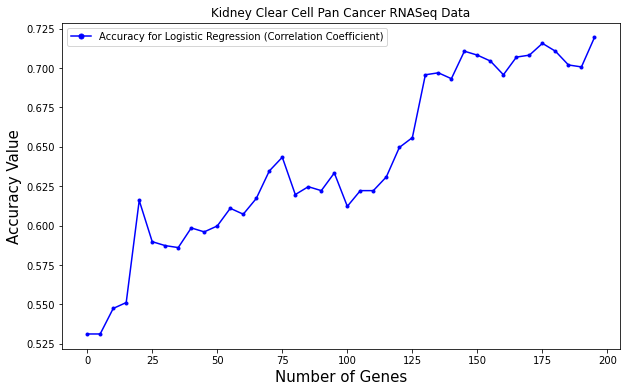

In [137]:
plt.figure(figsize=(10, 6)) 

genes = [i*5 for i in range(40)]

plt.errorbar(genes,finalAcc,linestyle='-', marker='.', color='blue')

plt.title("Kidney Clear Cell Pan Cancer RNASeq Data")


p1 = mlines.Line2D([], [], color='blue', marker='.', linestyle='-',
                          markersize=10, label='Accuracy for Logistic Regression (Correlation Coefficient)')


plt.legend(handles=[p1])




plt.xlabel("Number of Genes",size =15)
plt.ylabel("Accuracy Value",size=15)